<a href="https://colab.research.google.com/github/Adeyinka-hub/MY-MACHINE-LEARNING-AND-DEEP-LEARNING-WORKS-ON-KAGGLE-AND-ZINDI-RESPECTIVELY/blob/master/Hyper_Parameter_Tuning_KAGGLE_Categorical_Features_Encoding_II_32nd_POSITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

In [ ]:
train = pd.read_csv('train.csv', header=0,encoding = 'unicode_escape')
test = pd.read_csv('test.csv', header=0,encoding = 'unicode_escape')

labels = train.pop('target')
labels = labels.values

train_id = train.pop("id")
test_id = test.pop("id")


In [ ]:
train.shape, test.shape

((600000, 23), (400000, 23))

In [ ]:
train.head(5)

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0
1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0
2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0
3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0
4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,777d1ac2c,3a7975e46,bc9cc2a94,NaN,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0


In [ ]:
data = pd.concat([train, test])
data["ord_5a"] = data["ord_5"].str[0]
data["ord_5b"] = data["ord_5"].str[1]
#data.drop(["bin_0", "ord_5"], axis=1, inplace=True)

In [ ]:
columns = [i for i in data.columns]

dummies = pd.get_dummies(data,
                         columns=columns,
                         drop_first=True,
                         sparse=True)

del data

In [ ]:
train = dummies.iloc[:train.shape[0], :]
test = dummies.iloc[train.shape[0]:, :]

del dummies

In [ ]:
train = train.fillna(0)
train.head(5)

,bin_0_1.0,bin_1_1.0,bin_2_1.0,bin_3_T,bin_4_Y,nom_0_Green,nom_0_Red,nom_1_Polygon,nom_1_Square,nom_1_Star,nom_1_Trapezoid,nom_1_Triangle,nom_2_Cat,nom_2_Dog,nom_2_Hamster,nom_2_Lion,nom_2_Snake,nom_3_China,nom_3_Costa Rica,nom_3_Finland,nom_3_India,nom_3_Russia,nom_4_Oboe,nom_4_Piano,nom_4_Theremin,nom_5_0054c0c3a,nom_5_00a731d2e,nom_5_014770cf0,nom_5_0165aa0c3,nom_5_023ed7074,nom_5_024efa364,nom_5_0276cf712,nom_5_0286dc1e1,nom_5_0289ab250,nom_5_028a6acde,nom_5_029d67ae5,nom_5_0385d0739,nom_5_0388c582c,nom_5_03c739608,nom_5_03cbd5a22,...,ord_5b_K,ord_5b_L,ord_5b_M,ord_5b_N,ord_5b_O,ord_5b_P,ord_5b_Q,ord_5b_R,ord_5b_S,ord_5b_T,ord_5b_U,ord_5b_V,ord_5b_W,ord_5b_X,ord_5b_Y,ord_5b_Z,ord_5b_a,ord_5b_b,ord_5b_c,ord_5b_e,ord_5b_f,ord_5b_g,ord_5b_h,ord_5b_i,ord_5b_j,ord_5b_k,ord_5b_l,ord_5b_m,ord_5b_n,ord_5b_o,ord_5b_p,ord_5b_q,ord_5b_r,ord_5b_s,ord_5b_t,ord_5b_v,ord_5b_w,ord_5b_x,ord_5b_y,ord_5b_z
0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(train.shape)
print(test.shape)

(600000, 5777)
(400000, 5777)


In [ ]:
train = train.sparse.to_coo().tocsr()
test = test.sparse.to_coo().tocsr()

In [ ]:
# 784.759970

In [ ]:
lr_cv = LogisticRegressionCV(Cs=7,
                        solver="lbfgs",
                        tol=0.0001,
                        max_iter=30000,
                        cv=5)

lr_cv.fit(train, labels)

lr_cv_pred = lr_cv.predict_proba(train)[:, 1]
score = roc_auc_score(labels, lr_cv_pred)

print("score: ", score)

score:  0.7937793996027523


In [ ]:
#submission['id'] = test_id
#submission['target'] = lr_cv.predict_proba(test)[:, 1]

In [ ]:
#submission.head()

In [ ]:
#submission.to_csv("submission_lr_cv.csv", index=False)

In [ ]:
test_pred = lr_cv.predict_proba(test)[:, 1]

In [ ]:
submiss = pd.DataFrame({"id": test_id, "target": test_pred})
submiss.to_csv('Submission(LogisticRegression).csv', index=False)

# Hyper Parameter Tuning:

We will loop over parameter C (Inverse of regularization strength).
Inverse of regularization strength helps to avoid overfitting - it penalizes large values of your parameters
It also helps to find Global Minimum by moving to better "solutions" from local minimum to global minimum
The values of C to search should be n-equally-spaced values in log space ranging from 1e-5 to 1e5

In [ ]:
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

In [ ]:
np.geomspace(1e-5, 1e5, num=20)

array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])

In [ ]:
# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])

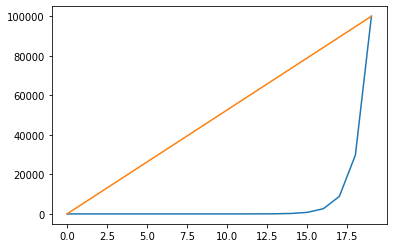

In [ ]:
# ploting it
plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space
# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace

In [ ]:
# Looping over the parameters
from sklearn.linear_model import LogisticRegression
lv_cv = LogisticRegression()
C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

In [ ]:
# putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)

# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

# Alternative Logistic Regression Hyperparameter tuning:

In [ ]:
# Another way of doing the above
# Scikit-learn offers a LogisticRegressionCV module which implements Logistic Regression 
# with builtin cross-validation to find out the optimal C parameter

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)


lr_cv =LogisticRegressionCV(random_state=15, Cs = C_List, solver ='lbfgs')
lr_cv.fit(train, labels)
print("The CA is:",lr_cv .score(labels, lr_cv_pred))
pred_proba_t = lr_cv .predict_proba(test)
log_loss3 = log_loss(labels, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", lr_cv.C_)


In [ ]:
for c in C_List:
    lr_cv = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    lr_cv.fit(train, labels)
    score = roc_auc_score(labels, lr_cv_pred)
    #score = lr_cv.score(labels, lr_cv_pred)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    lr_cv_pred = lr_cv.predict_proba(train)[:, 1]
    pred_proba = lr_cv.predict_proba(test)[:, 1]
    log_loss2 = log_loss(labels, pred_proba)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")